# Burgers equation solver

Very similar to the Advection solver, but this time without the work with directories: I just need a few plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sp
import imageio
import os

In [3]:
# check if the directory already exist
if not os.path.isdir('./images'):
    os.makedirs('./images')
    
# Empty the 'frames' folder
for file_name in os.listdir('./images'):
    file_path = os.path.join('./images', file_name)
    os.remove(file_path)

os.listdir('./')

# set the directory where your images are stored
directory = "./images/"

# get the list of image files in the directory
files = os.listdir(directory)

# sort the files in alphanumeric order
files = sorted(files)

In [16]:
#Define the speed of the wave v 
v = 10       # Speed to compute the delta_t

# Define the domain
L = 10.0     # Domain length

# Define the final time
t_final = 0.5

# Courant factor: you can pick a vector or a single value
cf = 0.5 

# Grid points:
nx = 101

movie_condition = True

# Vector of grid points, grid spacing
nx_vec = np.array([nx, 2*nx, 3*nx, 5*nx])
dx_vec = L / (nx_vec - 1) 
x_vec = [np.linspace(0, L, i) for i in nx_vec]

# Vector of timesteps and iteration number vector
dt_vec = cf * dx_vec / v
n_it_vec = t_final * (dt_vec**-1)


Here there are just few plots, I prefered to do a full code without creating directories and so on

nx_vec =  [101 202 303 505]
dx_vec =  [0.1        0.04975124 0.03311258 0.01984127]
dt_vec =  [0.005      0.00248756 0.00165563 0.00099206]
Courant factor = 0.5
Dissipative term for each dx =  [1.         0.49751244 0.33112583 0.1984127 ]
Number of iterations = [100. 201. 302. 504.] 

yes 0.1
yes
Max of L2 Norm for each number of points =  3.514638472171447
yes 0.1
yes
Max of L2 Norm for each number of points =  3.514638472171447
yes 0.1
yes
Max of L2 Norm for each number of points =  3.514638472171447
yes 0.1
yes
Max of L2 Norm for each number of points =  3.514638472171447


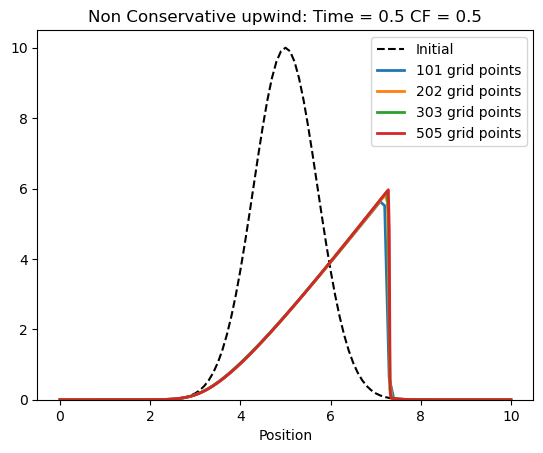

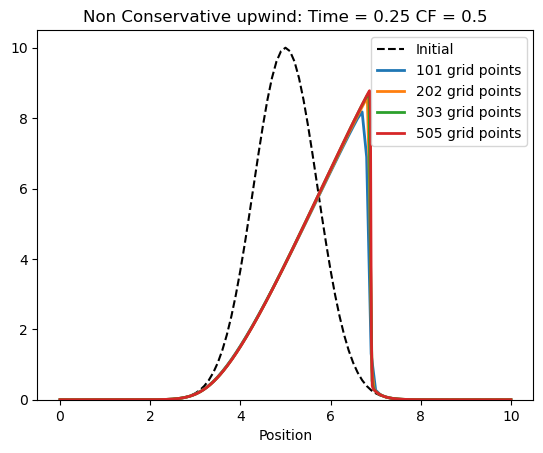

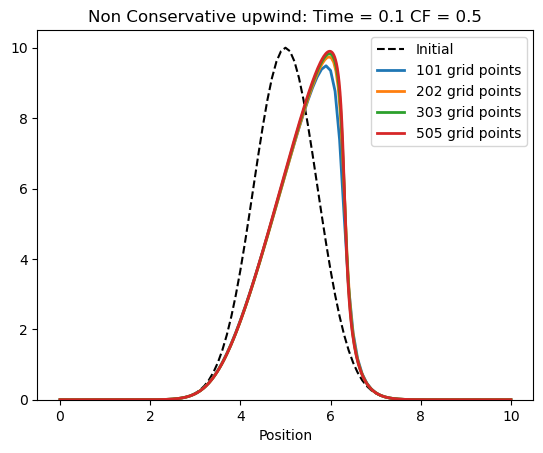

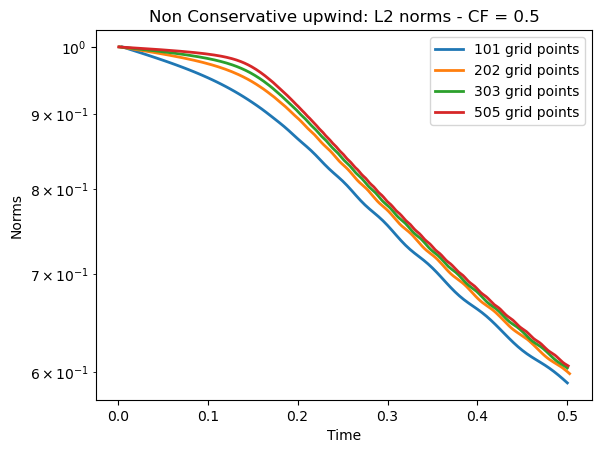

yes 0.1
yes
Max of L2 Norm for each number of points =  3.5194180669340245
yes 0.1
yes
Max of L2 Norm for each number of points =  3.5194180669340245
yes 0.1
yes
Max of L2 Norm for each number of points =  3.5194180669340245
yes 0.1
yes
Max of L2 Norm for each number of points =  3.5194180669340245


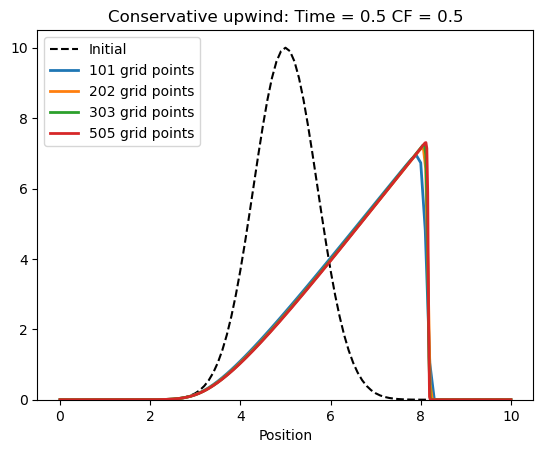

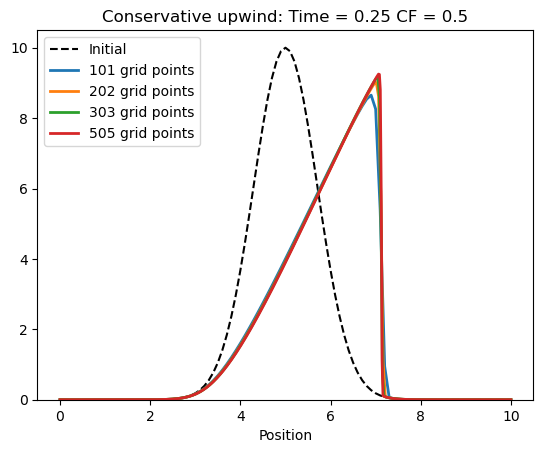

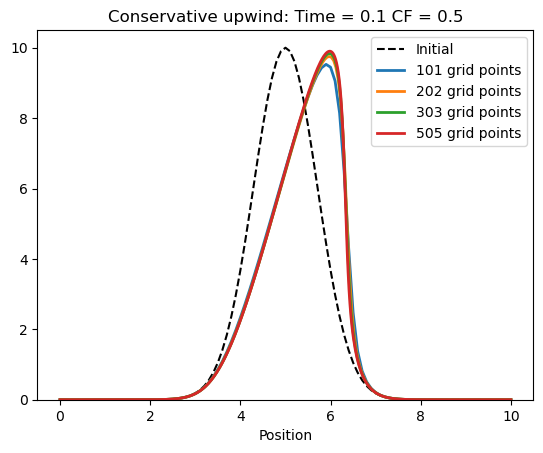

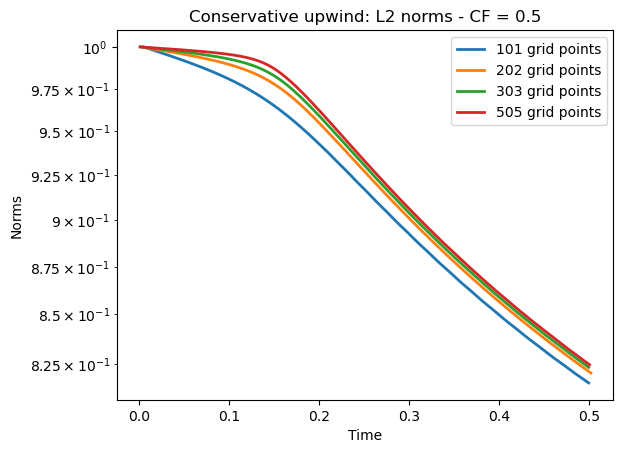

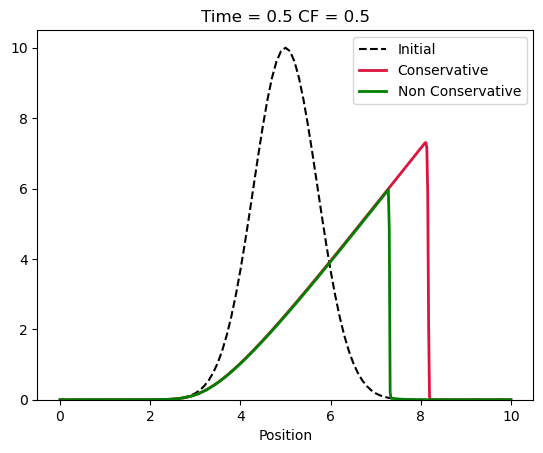

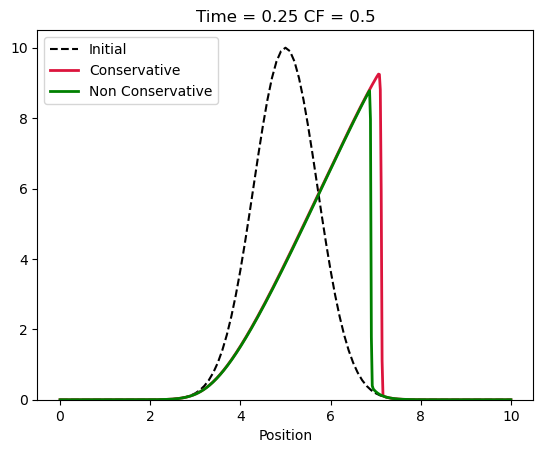

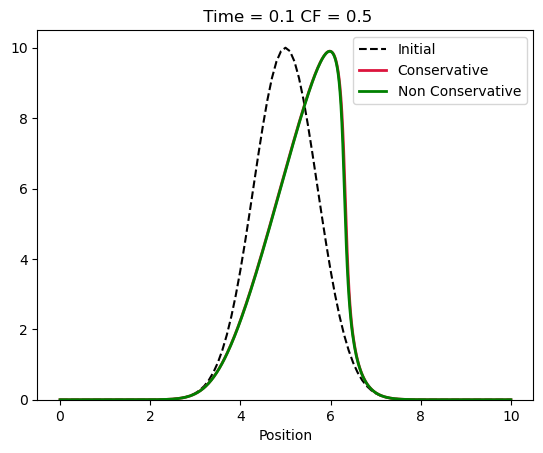

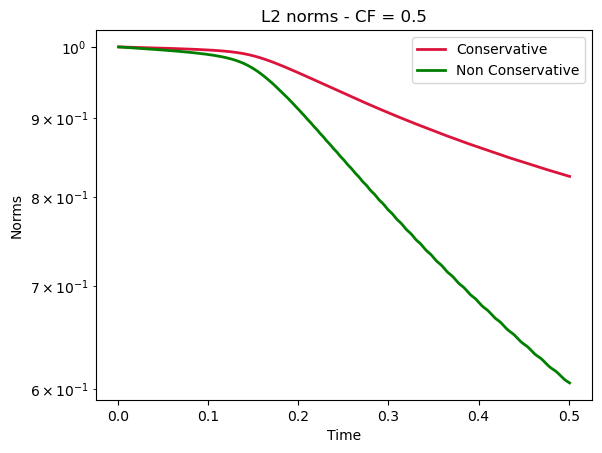

In [13]:
u_initial_0 = 10 * np.exp(-(x_vec[0]- 5)**2)

methods = np.array(['Non Conservative upwind','Conservative upwind'])
comparison = True

print('nx_vec = ', nx_vec)
print('dx_vec = ', dx_vec)
print('dt_vec = ', dt_vec)

# cf = C_sound / C_sim        C_sim = (dx_vec/dt_vec)   C_sound = v
print('Courant factor =', cf)   
print('Dissipative term for each dx = ', 0.5 * v * dx_vec / cf)
print('Number of iterations =', n_it_vec, '\n')

# Solver
if comparison == True:
    
    cL2_plots = []
    ctime_plots = []
    csolution_plots = []
    cintermediate_plots = []
    cplots_01 = []
    ctime_01 = []
    cint_time = []
    
    ncL2_plots = []
    nctime_plots = []
    ncsolution_plots = []
    ncintermediate_plots = []
    ncplots_01 = []
    nctime_01 = []
    ncint_time = []
    
    for method in methods:
        
        L2_plots = []
        time_plots = []
        solution_plots = []
        intermediate_plots = []
        plots_01 = []
        time_01 = []
        int_time = []
        
        for j in range(len(x_vec)):
            
            x0 = 5
            u_initial = 10 * np.exp(-(x_vec[j]-x0)**2)
            
            # Initialize the solution array 
            # the 'current' and the 'next' are related to n and n+1 time indeces
            # 'previous' is for n-1
            u_current = u_initial.copy()
            u_previous = u_initial.copy()
            
            t = 0.0
            i = 0
            
            L2norm_LF = []
            time = []
            
            while t < t_final:
                 
                 if method == 'Conservative upwind':
                     # Compute the new solution using the Upwind scheme in conservative form
                     u_next = u_current - 0.5 * dt_vec[j] / dx_vec[j] * (u_current**2 - np.roll(u_current, 1)**2) 
                 
                 elif method == 'Non Conservative upwind':
                     # Compute the new solution using the Upwind scheme in non conservative form
                     u_next = u_current - dt_vec[j] / dx_vec[j] * u_current * (u_current - np.roll(u_current, 1))
        
                 
                 # Update the solution
                 u_current = u_next.copy()
            
                 # advance the time and plot counter
                 t += dt_vec[j]
                 i += 1
             
                 # compute the L2 norm and add the time to the time vector
                 L2norm_LF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
                 time.append(t)
                 
                 # plot the current result and save in an image every 10 iterations
                 if (j == 2 and movie_condition == True):
                     
                     plt.plot(x_vec[j], u_current)
                     plt.title('Time=' + str(round(t,2)))
                     plt.ylim(0, 10.5)
                     plt.savefig('./images/fig_' + str(i).zfill(5)+ '.png', dpi = 200)
                     plt.close()
        
                 # Plotting at half of the time
                 if (t > t_final/2 and t < (t_final/2 + dt_vec[j])):
                     
                     intermediate_plots.append([x_vec[j], u_current])
                     int_time.append(t)
                     print('yes')
                     
                 # Plotting 0.1 of the time
                 if (t > 0.1 and t < (0.1 + dt_vec[j])):
                     
                     plots_01.append([x_vec[j], u_current])
                     time_01.append(t)
                     print('yes 0.1')
                
            solution_plots.append([x_vec[j], u_current])
         
            # Updating the vectors for the plot of L2 norm
            L2_plots.append(L2norm_LF.copy())
            time_plots.append(time.copy())    
            print('Max of L2 Norm for each number of points = ', L2_plots[0][0])
             
        fig = plt.figure()
        
        # initial condition for the images of the code
        plt.plot(x_vec[0], u_initial_0, label = 'Initial', c = 'black', ls = '--')
         
        # Taking the vectors for conservative and non conservative case:
        if method == 'Conservative upwind':
            
            cL2_plots = L2_plots
            ctime_plots = time_plots
            csolution_plots = solution_plots
            cintermediate_plots = intermediate_plots
            cplots_01 = plots_01
            ctime_01 = time_01
            cint_time = int_time
            
            # cL2_plots = np.array(cL2_plots)
            # ctime_plots = np.array(ctime_plots)
            # csolution_plots = np.array(csolution_plots)
            # cintermediate_plots = np.array(cintermediate_plots)
            # cplots_01 = np.array(cplots_01)
            # ctime_01 = np.array(ctime_01)
            # cint_time = np.array(cint_time)
            
        
        elif method == 'Non Conservative upwind':
            
            ncL2_plots = L2_plots
            nctime_plots = time_plots
            ncsolution_plots = solution_plots
            ncintermediate_plots = intermediate_plots
            ncplots_01 = plots_01
            nctime_01 = time_01
            ncint_time = int_time  
        
        
        # plotting the final solution (t = 20), for each number of
        # grid points
        for j in range(len(x_vec)):
            
            plt.plot(solution_plots[j][0], solution_plots[j][1], label= str(nx_vec[j]) + ' grid points', lw = 2) 
            
        plt.title( method + ': Time = ' + str(round(t,2)) +' CF = ' + str(cf))
        plt.xlabel('Position')
        plt.ylim(0, 10.5)
        plt.legend()   
        plt.show()
        
        plt.plot(x_vec[0], u_initial_0, label = 'Initial', c = 'black', ls = '--')
        
        # Intermediate plots
        for j in range(len(x_vec)):
            
            
            plt.plot(intermediate_plots[j][0], intermediate_plots[j][1], label= str(nx_vec[j]) + ' grid points', lw = 2) 
            
        plt.title( method + ': Time = ' + str(round(int_time[j],2)) +' CF = ' + str(cf))
        plt.xlabel('Position')
        plt.ylim(0, 10.5)
        plt.legend()   
        plt.show()
        
        plt.plot(x_vec[0], u_initial_0, label = 'Initial', c = 'black', ls = '--')
        
        # Intermediate plots
        for j in range(len(x_vec)):
            
            
            plt.plot(plots_01[j][0], plots_01[j][1], label= str(nx_vec[j]) + ' grid points', lw = 2) 
            
        plt.title( method + ': Time = ' + str(round(time_01[j],2)) +' CF = ' + str(cf))
        plt.xlabel('Position')
        plt.ylim(0, 10.5)
        plt.legend()   
        plt.show()
         
        # Plotting the L2 norms for each number of point
        for i in range(len(time_plots)) : 
             
             plt.plot(time_plots[i], L2_plots[i]/L2_plots[i][0], lw = 2, label = str(nx_vec[i]) + ' grid points')
        
        plt.title(method + ': L2 norms - CF = ' + str(cf))
        plt.xlabel('Time')
        plt.ylabel('Norms')
        plt.yscale('log')
        plt.legend()
        plt.show()
        
    # Comparison plotting 
    
    plt.plot(x_vec[0], u_initial_0, label = 'Initial', c = 'black', ls = '--')
            
    plt.plot(csolution_plots[-1][0], csolution_plots[-1][1], label= 'Conservative', lw = 2, c = 'crimson') 
    plt.plot(ncsolution_plots[-1][0], ncsolution_plots[-1][1], label= 'Non Conservative', lw = 2, c = 'green') 

    plt.title('Time = ' + str(round(t,2)) +' CF = ' + str(cf))
    plt.xlabel('Position')
    plt.ylim(0, 10.5)
    plt.legend()   
    plt.show()
        
    plt.plot(x_vec[0], u_initial_0, label = 'Initial', c = 'black', ls = '--')
    
    # Intermediate plots
        
    plt.plot(cintermediate_plots[-1][0], cintermediate_plots[-1][1], label= 'Conservative', lw = 2, c = 'crimson') 
    plt.plot(ncintermediate_plots[-1][0], ncintermediate_plots[-1][1], label= 'Non Conservative', lw = 2, c = 'green') 

    plt.title('Time = ' + str(round(cint_time[-1],2)) +' CF = ' + str(cf))
    plt.xlabel('Position')
    plt.ylim(0, 10.5)
    plt.legend()   
    plt.show()
        
    plt.plot(x_vec[0], u_initial_0, label = 'Initial', c = 'black', ls = '--')
    
    # 0.1 plots
    
    plt.plot(cplots_01[-1][0], cplots_01[-1][1], label= 'Conservative', lw = 2, c = 'crimson')
    plt.plot(ncplots_01[-1][0], ncplots_01[-1][1], label= 'Non Conservative', lw = 2, c = 'green')

    plt.title(' Time = ' + str(round(ctime_01[-1],2)) +' CF = ' + str(cf))
    plt.xlabel('Position')
    plt.ylim(0, 10.5)
    plt.legend()   
    plt.show()
         
    # Plotting the L2 norms for each number of point
 
    plt.plot(ctime_plots[-1], cL2_plots[-1]/cL2_plots[-1][0], label= 'Conservative', lw = 2, c = 'crimson')
    plt.plot(nctime_plots[-1], ncL2_plots[-1]/ncL2_plots[-1][0], label= 'Non Conservative', lw = 2, c = 'green')
        
    plt.title('L2 norms - CF = ' + str(cf))
    plt.xlabel('Time')
    plt.ylabel('Norms')
    plt.yscale('log')
    plt.legend()
    plt.show()
        
        
        
        

